In [1]:
!pip install openpyxl
!pip install econml
!pip install shap
!pip install scikit-learn
!pip install pytorch_tabnet
!pip install datasets
!pip install --upgrade xgboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 13.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Usin

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import sklearn
import xgboost
import shap

print("SHAP version:", shap.__version__)
print("XGBoost version:", xgboost.__version__)

SHAP version: 0.46.0
XGBoost version: 2.1.1


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Reading data from drive and assign to data frame named dfs

In [5]:
dfs=[]
for i in range(4):
  df=pd.read_excel('/content/drive/MyDrive/eLoriCorps-Database-E1-MAIN-IA-index-Y.xlsx',sheet_name=i)
  df=df.replace(999,np.nan)
  df=df.replace(888,np.nan)
  df=df.replace(999.0,np.nan)
  df=df.replace('20/04/1969',(2024-1969))
  df=df.replace('4/6/2000',(2024-2000))
  # df=df.replace(np.nan,None)
  dfs.append(df)


In [ ]:
sheet1features=(set(dfs[0].columns)-set(dfs[1].columns))-set(dfs[2].columns)
sheet2features=(set(dfs[1].columns)-set(dfs[0].columns))-set(dfs[2].columns)
sheet3features=(set(dfs[2].columns)-set(dfs[1].columns))-set(dfs[0].columns)
print('sheet1features:',len(sheet1features))
print('sheet2features:',len(sheet2features))
print('sheet3features:',len(sheet3features))


sheet1features: 19
sheet2features: 25
sheet3features: 26


In [ ]:
res=[]
for i in range(445):
  l=[]
  for j in range(3):



# check the number of missed value each sheet

In [6]:
for i in range(3):
  print(str(i)+'info')
  dfs[i].info()
  print('----------------------------------------------')

0info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID-BDL             445 non-null    object 
 1   Poids              320 non-null    float64
 2   Taille             332 non-null    float64
 3   Age                368 non-null    float64
 4   EDI1               363 non-null    float64
 5   EDI2               361 non-null    float64
 6   EDI3               363 non-null    float64
 7   EDI4-INV           363 non-null    float64
 8   EDI5-INV           361 non-null    float64
 9   EDI6-INV           363 non-null    float64
 10  EDI7-INV           363 non-null    float64
 11  EDI8               362 non-null    float64
 12  EDI9               361 non-null    float64
 13  EDI10              360 non-null    float64
 14  EDI11              361 non-null    float64
 15  EDI12              362 non-null    float64
 16  EDI13              3

# Start filling missed value firstly by interpolation

In [7]:
data1=dfs[1].interpolate()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID-BDL                445 non-null    object 
 1   Poids                 444 non-null    float64
 2   Taille                445 non-null    float64
 3   Age                   444 non-null    float64
 4   EDE-Q1                445 non-null    float64
 5   EDE-Q2                445 non-null    float64
 6   EDE-Q3                445 non-null    float64
 7   EDE-Q4                445 non-null    float64
 8   EDE-Q5                445 non-null    float64
 9   EDE-Q6                445 non-null    float64
 10  EDE-Q7                445 non-null    float64
 11  EDE-Q8                445 non-null    float64
 12  EDE-Q9                445 non-null    float64
 13  EDE-Q10               445 non-null    float64
 14  EDE-Q11               445 non-null    float64
 15  EDE-Q12               4

<ipython-input-7-968f9652f73e>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data1=dfs[1].interpolate()


# Check the filled missed value on the column 'EDE-Q-TOT-Index_Y_SD' all the mount must be 0,1 as target culumn

In [11]:
wrongfilled=[]
for i in range(445):
  if data1['EDE-Q-TOT-Index_Y_SD'][i]!=0 and data1['EDE-Q-TOT-Index_Y_SD'][i]!=1:
    wrongfilled.append(i)
    if data1['EDE-Q-TOT-Index_Y_SD'][i] > 0.5:
      data1['EDE-Q-TOT-Index_Y_SD'][i]=1
    else:
      data1['EDE-Q-TOT-Index_Y_SD'][i]=0
# wrongfilled
print(len(wrongfilled))

0


final part of filling missed value to have a clean data

In [10]:
data1['Poids'][0]=np.mean(data1['Poids'])
data1['Age'][0]=np.mean(data1['Age'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID-BDL                445 non-null    object 
 1   Poids                 445 non-null    float64
 2   Taille                445 non-null    float64
 3   Age                   445 non-null    float64
 4   EDE-Q1                445 non-null    float64
 5   EDE-Q2                445 non-null    float64
 6   EDE-Q3                445 non-null    float64
 7   EDE-Q4                445 non-null    float64
 8   EDE-Q5                445 non-null    float64
 9   EDE-Q6                445 non-null    float64
 10  EDE-Q7                445 non-null    float64
 11  EDE-Q8                445 non-null    float64
 12  EDE-Q9                445 non-null    float64
 13  EDE-Q10               445 non-null    float64
 14  EDE-Q11               445 non-null    float64
 15  EDE-Q12               4

<ipython-input-10-21b39adcf6a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Poids'][0]=np.mean(data1['Poids'])
<ipython-input-10-21b39adcf6a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age'][0]=np.mean(data1['Age'])


# checking data to know are they need to normalized or not?

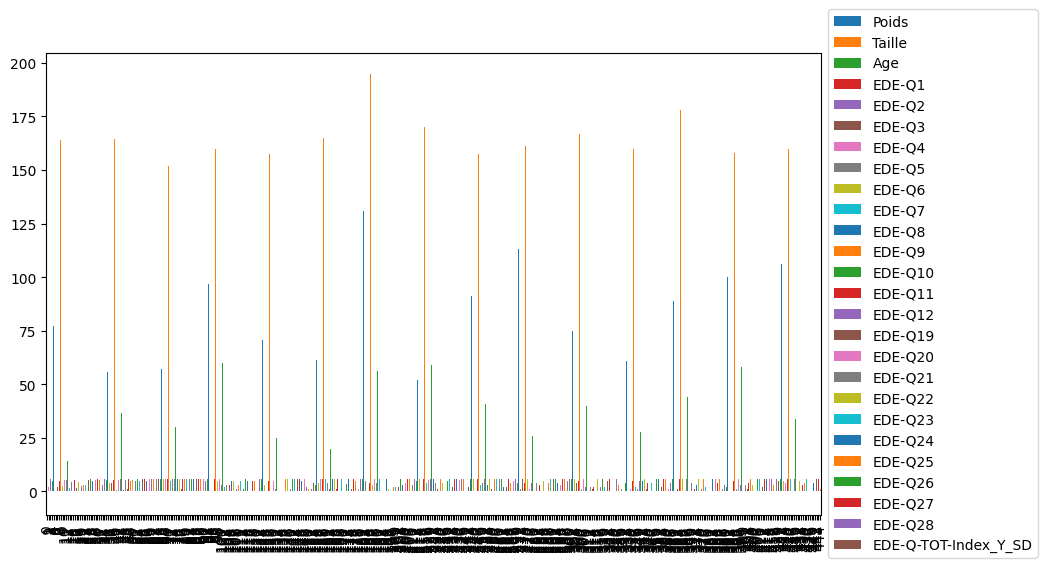

In [12]:
import matplotlib.pyplot as plt

# Dropping specified columns and creating the bar plot
ax = data1.drop(['ID-BDL','EDE-Q-TOT', 'EDE-Q-TOT-Index_F_M'], axis=1)[:].plot(kind='bar', figsize=(10, 6))

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove axis labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')

# Displaying the plot
plt.show()

In [13]:

# copy the data
data1scaled = data1.copy().drop(['ID-BDL','EDE-Q-TOT', 'EDE-Q-TOT-Index_F_M'], axis=1)

# apply normalization techniques
for column in data1scaled.columns:
    data1scaled[column] = data1scaled[column]  / data1scaled[column].abs().max()

# view normalized data
display(data1scaled)

Poids    Taille      Age    EDE-Q1    EDE-Q2    EDE-Q3    EDE-Q4  \
0    0.466935  0.830769  0.47388  1.000000  0.000000  1.000000  0.333333   
1    0.367568  0.846154  0.56250  1.000000  0.000000  1.000000  0.333333   
2    0.487027  0.830769  0.38750  0.833333  0.166667  0.833333  0.833333   
3    0.451757  0.856410  0.36250  0.835897  0.179487  0.835897  0.835897   
4    0.416486  0.882051  0.33750  0.838462  0.192308  0.838462  0.838462   
..        ...       ...      ...       ...       ...       ...       ...   
440  0.481081  0.846154  0.50000  0.500000  0.000000  0.500000  0.500000   
441  0.357297  0.789744  0.17500  0.000000  0.000000  0.000000  0.000000   
442  0.317838  0.820513  0.25000  1.000000  0.166667  1.000000  0.000000   
443  0.832432  0.856410  0.61250  0.500000  0.166667  0.166667  0.000000   
444  0.713514  0.871795  0.71250  0.000000  0.000000  0.000000  0.000000   

       EDE-Q5    EDE-Q6    EDE-Q7  ...   EDE-Q20   EDE-Q21   EDE-Q22  \
0    0.000000  1.000000  0.500000  ...  1.000000  0.428571  1.000000   
1    0.000000  1.000000  0.500000  ...  1.000000  0.428571  1.000000   
2    0.000000  0.333333  0.333333  ...  0.833333  0.571429  0.666667   
3    0.015385  0.343590  0.328205  ...  0.835749  0.575569  0.671498   
4    0.030769  0.353846  0.323077  ...  0.838164  0.579710  0.676329   
..        ...       ...       ...  ...       ...       ...       ...   
440  1.000000  1.000000  1.000000  ...  0.500000  0.000000  0.666667   
441  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
442  1.000000  1.000000  1.000000  ...  1.000000  0.285714  0.666667   
443  0.166667  0.666667  0.333333  ...  1.000000  0.857143  1.000000   
444  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   

      EDE-Q23   EDE-Q24   EDE-Q25   EDE-Q26   EDE-Q27   EDE-Q28  \
0    1.000000  0.833333  1.000000  1.000000  0.666667  0.500000   
1    1.000000  0.833333  1.000000  1.000000  0.666667  0.500000   
2    0.333333  0.833333  0.833333  0.833333  0.833333  0.833333   
3    0.342995  0.833333  0.835749  0.835749  0.835749  0.835897   
4    0.352657  0.833333  0.838164  0.838164  0.838164  0.838462   
..        ...       ...       ...       ...       ...       ...   
440  0.666667  0.666667  1.000000  1.000000  1.000000  0.666667   
441  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
442  0.666667  0.333333  0.666667  0.666667  1.000000  0.166667   
443  0.333333  0.333333  0.500000  0.333333  0.333333  0.333333   
444  0.000000  0.000000  0.166667  0.166667  0.000000  0.000000   

     EDE-Q-TOT-Index_Y_SD  
0                     1.0  
1                     1.0  
2                     0.0  
3                     0.0  
4                     0.0  
..                    ...  
440                   0.0  
441                   0.0  
442                   1.0  
443                   0.0  
444                   0.0  

[445 rows x 26 columns]

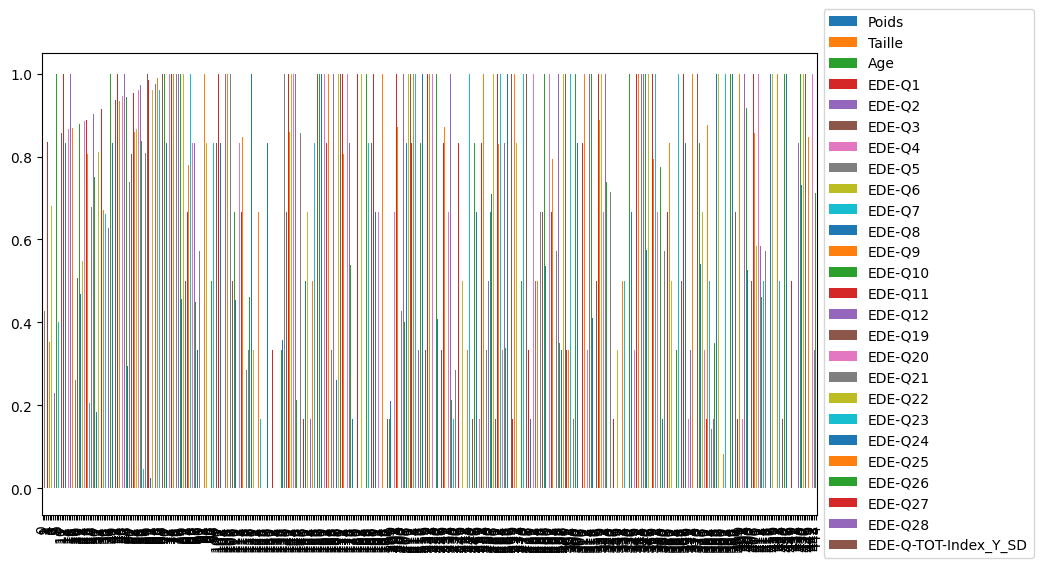

In [14]:
import matplotlib.pyplot as plt

# Dropping specified columns and creating the bar plot
ax = data1scaled.plot(kind='bar', figsize=(10, 6))

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove axis labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')

# Displaying the plot
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
import torch
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#### data we used:
data=data1scaled.copy()

target_column = 'EDE-Q-TOT-Index_Y_SD'

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Perform label encoding for categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define TabNet classifier model
clf = TabNetClassifier(device_name='cuda' if torch.cuda.is_available() else 'cpu')

# Train the model
clf.fit(
    X_train=X_train.values,
    y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_test.values, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=300,  # Adjust as needed
    patience=300,  # Adjust as needed
    batch_size=128,  # Adjust as needed
    virtual_batch_size=32,  # Adjust as needed
    num_workers=0,  # Adjust as needed
    drop_last=False,
    loss_fn=None
)

# Evaluate the model
test_acc = accuracy_score(y_test, clf.predict(X_test.values))
print("Test accuracy:", test_acc)

import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.95694 | train_accuracy: 0.55618 | test_accuracy: 0.4382  |  0:00:01s
epoch 1  | loss: 0.67036 | train_accuracy: 0.66011 | test_accuracy: 0.52809 |  0:00:01s
epoch 2  | loss: 0.56227 | train_accuracy: 0.66011 | test_accuracy: 0.65169 |  0:00:02s
epoch 3  | loss: 0.49126 | train_accuracy: 0.55899 | test_accuracy: 0.58427 |  0:00:02s
epoch 4  | loss: 0.4652  | train_accuracy: 0.50562 | test_accuracy: 0.57303 |  0:00:02s
epoch 5  | loss: 0.46041 | train_accuracy: 0.49438 | test_accuracy: 0.53933 |  0:00:02s
epoch 6  | loss: 0.40117 | train_accuracy: 0.48876 | test_accuracy: 0.53933 |  0:00:02s
epoch 7  | loss: 0.36982 | train_accuracy: 0.50562 | test_accuracy: 0.53933 |  0:00:02s
epoch 8  | loss: 0.43228 | train_accuracy: 0.51966 | test_accuracy: 0.53933 |  0:00:02s
epoch 9  | loss: 0.36993 | train_accuracy: 0.57022 | test_accuracy: 0.57303 |  0:00:03s
epoch 10 | loss: 0.38034 | train_accuracy: 0.57303 | test_accuracy: 0.58427 |  0:00:03s
epoch 11 | loss: 0.42774 | train

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [16]:
import numpy as np
import sklearn.model_selection
import xgboost

params = {
    'eta': 0.1,  # Increased learning rate
    'subsample': 0.9,  # Using more of the data for each tree
    'max_depth': 7,  # Allowing trees to grow deeper
    'objective': 'binary:logistic',  # Assuming a binary classification problem
    'eval_metric': 'logloss',  # Can be changed to 'auc', 'error', etc., based on the problem
}

def fit_xgboost(X, y):
    """Train an XGBoost model with early stopping and print the accuracy."""
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dtest = xgboost.DMatrix(X_test, label=y_test)
    model = xgboost.train(
    params,
    dtrain,
    num_boost_round=1000,  # Starting with a reasonable number of rounds
    evals=[(dtest, "test")],
    early_stopping_rounds=50,  # Adjust based on validation set performance
    verbose_eval=True,  # Set to True to see the training progress
    )
    # Predict the probabilities
    y_pred_prob = model.predict(dtest)
    # Convert probabilities to binary predictions
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)

    # Calculate the accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    print(f"Model accuracy: {accuracy:.4f}")

    return model
def predict_xgboost(model, X_new):
    """Predict using the trained XGBoost model."""
    dnew = xgboost.DMatrix(X_new)
    y_predict = model.predict(dnew)
    return y_predict

In [17]:
data=data1scaled.copy()

target_column = 'EDE-Q-TOT-Index_Y_SD'

X = data.drop(columns=[target_column])
y = data[target_column]

[0]	test-logloss:0.64042
[1]	test-logloss:0.58667
[2]	test-logloss:0.54087
[3]	test-logloss:0.50845
[4]	test-logloss:0.47775
[5]	test-logloss:0.45079
[6]	test-logloss:0.42495
[7]	test-logloss:0.40315
[8]	test-logloss:0.38960
[9]	test-logloss:0.37141
[10]	test-logloss:0.35476
[11]	test-logloss:0.33943
[12]	test-logloss:0.32568
[13]	test-logloss:0.31814
[14]	test-logloss:0.30654
[15]	test-logloss:0.29637
[16]	test-logloss:0.28519
[17]	test-logloss:0.27608
[18]	test-logloss:0.27082
[19]	test-logloss:0.26174
[20]	test-logloss:0.25479
[21]	test-logloss:0.25064
[22]	test-logloss:0.24228
[23]	test-logloss:0.24042
[24]	test-logloss:0.23428
[25]	test-logloss:0.22909
[26]	test-logloss:0.22479
[27]	test-logloss:0.22153
[28]	test-logloss:0.22187
[29]	test-logloss:0.21556
[30]	test-logloss:0.21322
[31]	test-logloss:0.21195
[32]	test-logloss:0.21211
[33]	test-logloss:0.20877
[34]	test-logloss:0.20703
[35]	test-logloss:0.20698
[36]	test-logloss:0.20324
[37]	test-logloss:0.20216
[38]	test-logloss:0.19

26it [00:11,  5.64s/it]


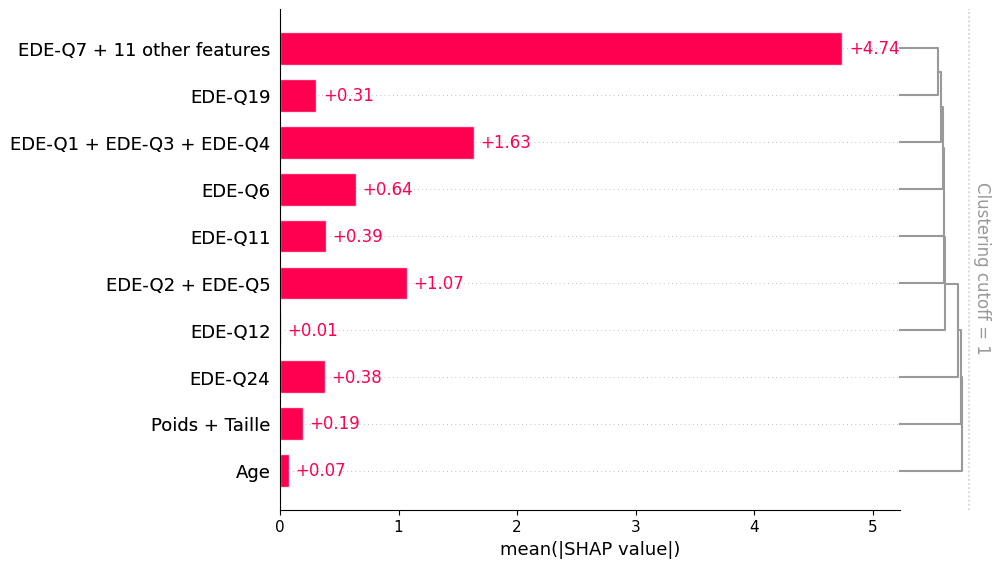

In [18]:
model = fit_xgboost(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
clust = shap.utils.hclust(X, y, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

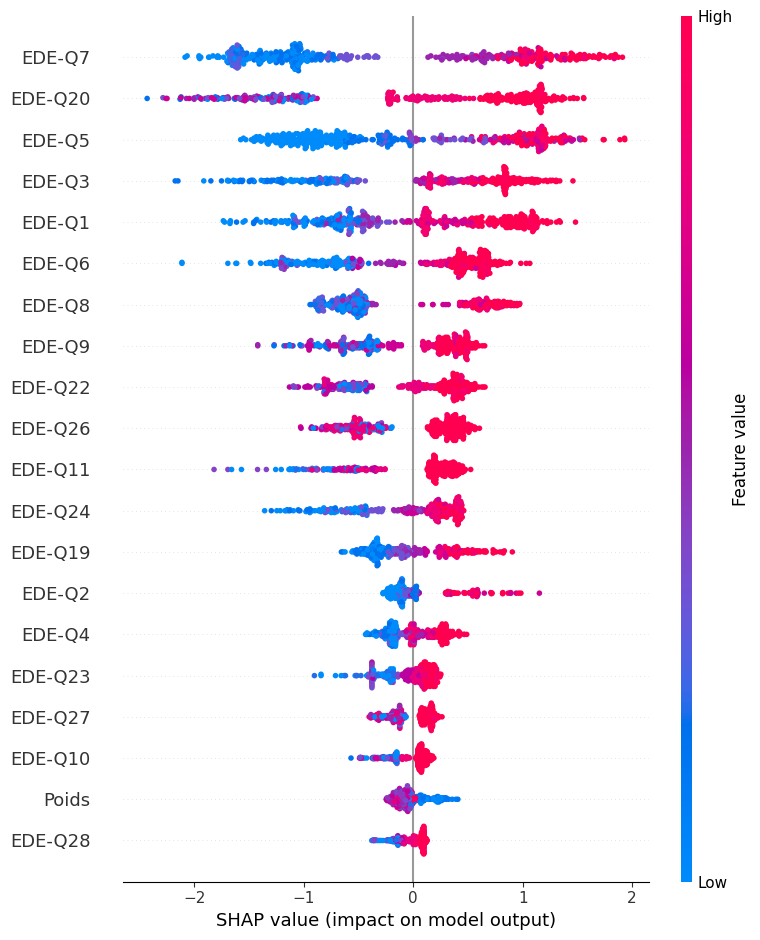

In [19]:

shap.summary_plot(shap_values, features=X, feature_names=X.columns)

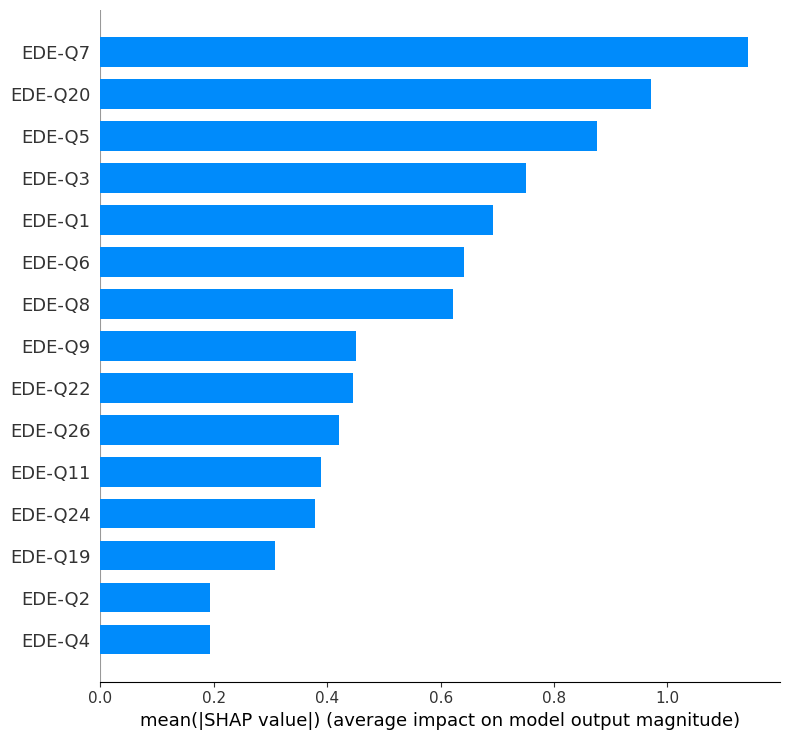

In [20]:
import shap

# Then, you can pass the feature_names to shap.summary_plot
shap.summary_plot(shap_values, max_display=15, show=False, plot_type='bar', feature_names=X.columns)

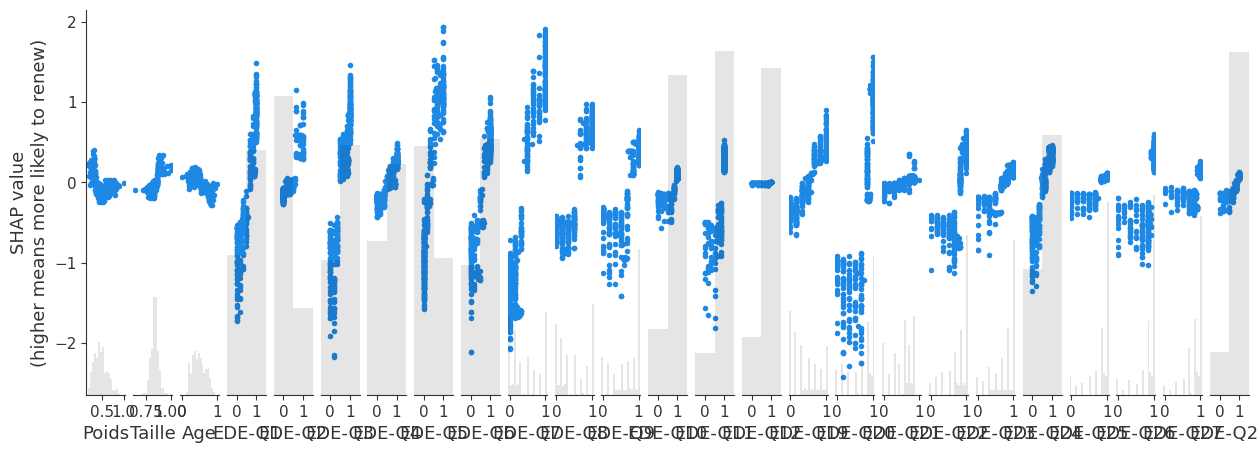

In [21]:
shap.plots.scatter(
    shap_values, ylabel="SHAP value\n(higher means more likely to renew)"
)

In [22]:
class FixableDataFrame(pd.DataFrame):
    """Helper class for manipulating generative models."""

    def __init__(self, *args, fixed={}, **kwargs):
        self.__dict__["__fixed_var_dictionary"] = fixed
        super().__init__(*args, **kwargs)

    def __setitem__(self, key, value):
        out = super().__setitem__(key, value)
        if isinstance(key, str) and key in self.__dict__["__fixed_var_dictionary"]:
            out = super().__setitem__(key, self.__dict__["__fixed_var_dictionary"][key])
        return out

In [23]:
def intervention(data, fixed={}, seed=0):
  if seed is not None:
        np.random.seed(seed)
  X = FixableDataFrame(data.copy(), fixed=fixed)
  # Iterate over the fixed interventions and apply them
  for key, value in fixed.items():
      if key in X.columns:
          X[key] = value
  return X



In [24]:
###XGBOOst
def marginal_effects(data, columns=None, max_points=20, logit=True, seed=0):
    """Helper function to compute the true marginal causal effects."""
    X = intervention(data)
    if columns is None:
        columns = X.columns
    ys = [[] for _ in columns]
    xs = [X[c].values for c in columns]
    xs = np.sort(xs, axis=1)
    xs = [xs[i] for i in range(len(xs))]
    for i, c in enumerate(columns):
        xs[i] = np.unique(
            [
                np.nanpercentile(xs[i], v, method="nearest")
                for v in np.linspace(0, 100, max_points)
            ]
        )
        for x in xs[i]:
            Xnew = intervention(data, fixed={c: x}, seed=seed)
            Xnew = Xnew.drop('EDE-Q-TOT-Index_Y_SD',axis=1)#droped column
            new_data =Xnew.copy()
            prediction = predict_xgboost(model,new_data)
            # prediction = clf.predict(Xnew.values)
            val = prediction.mean()
            if logit:
                val = scipy.special.logit(val)
            ys[i].append(val)
        ys[i] = np.array(ys[i])
    ys = [ys[i] - ys[i].mean() for i in range(len(ys))]
    return list(zip(xs, ys))




In [ ]:
#####tabnet
def marginal_effects(data, columns=None, max_points=20, logit=True, seed=0):
    """Helper function to compute the true marginal causal effects."""
    X = intervention(data)
    if columns is None:
        columns = X.columns
    ys = [[] for _ in columns]
    xs = [X[c].values for c in columns]
    xs = np.sort(xs, axis=1)
    xs = [xs[i] for i in range(len(xs))]
    for i, c in enumerate(columns):
        xs[i] = np.unique(
            [
                np.nanpercentile(xs[i], v, method="nearest")
                for v in np.linspace(0, 100, max_points)
            ]
        )
        for x in xs[i]:
            Xnew = intervention(data, fixed={c: x}, seed=seed)
            Xnew = Xnew.drop('EDE-Q-TOT-Index_Y_SD',axis=1)#droped column
            new_data =Xnew.copy()
            prediction = clf.predict(new_data.values)
            val = prediction.mean()
            if logit:
                val = scipy.special.logit(val)
            ys[i].append(val)
        ys[i] = np.array(ys[i])
    ys = [ys[i] - ys[i].mean() for i in range(len(ys))]
    return list(zip(xs, ys))




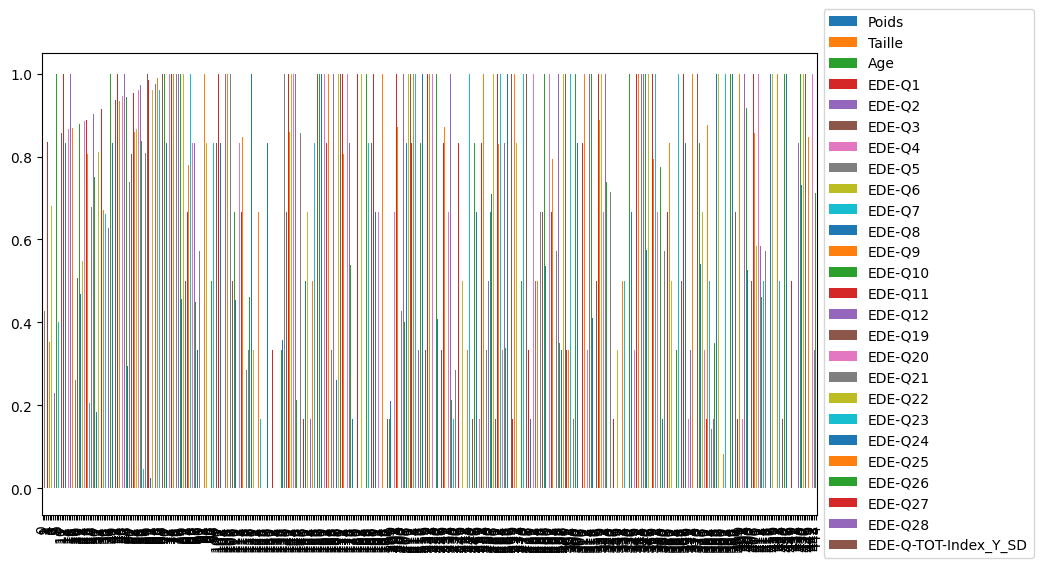

In [25]:
import matplotlib.pyplot as plt

# Dropping specified columns and creating the bar plot
ax = data.plot(kind='bar', figsize=(10, 6))

# Move the legend to the right
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove axis labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')

# Displaying the plot
plt.show()

In [26]:
marginal_effects_data = marginal_effects(data)

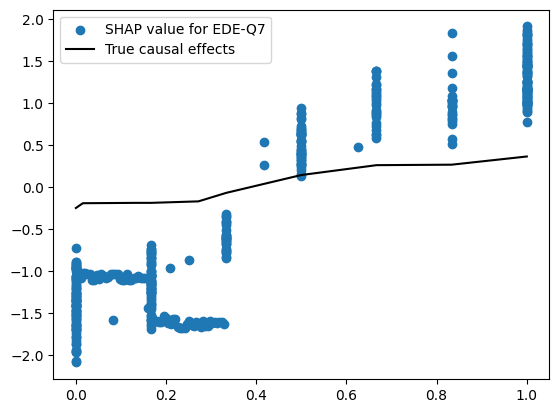

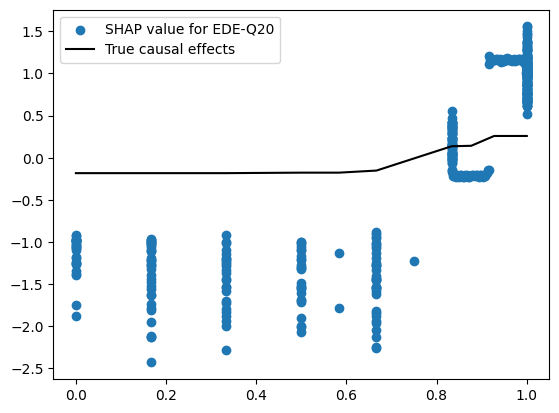

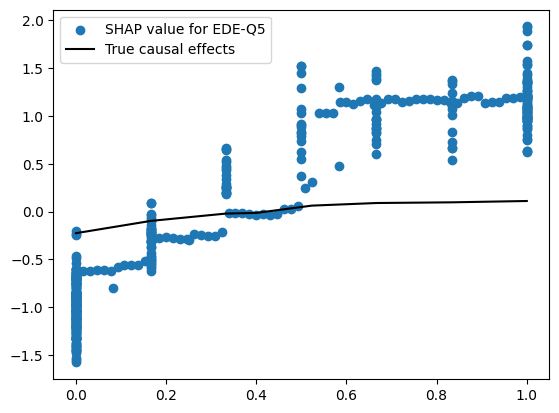

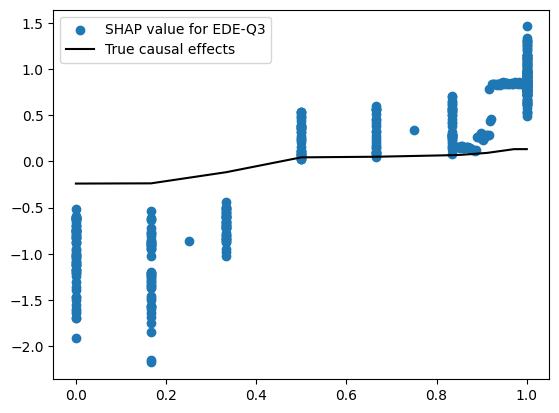

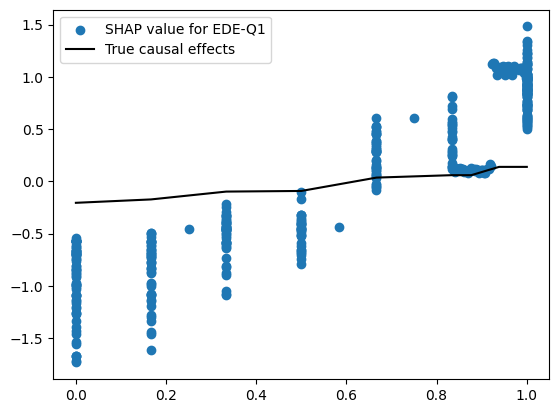

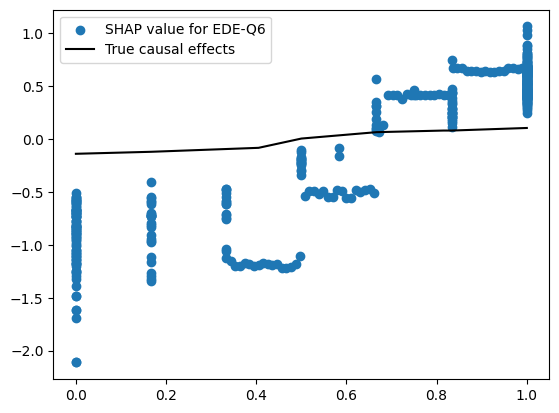

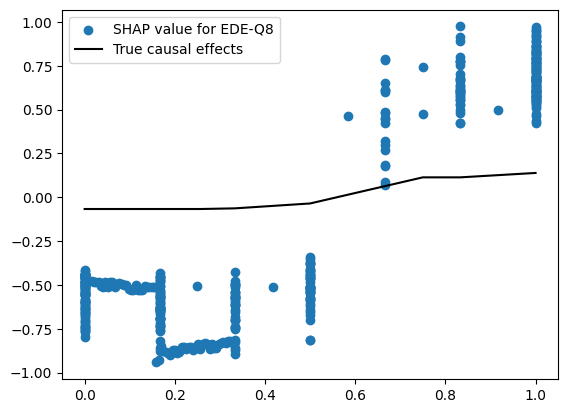

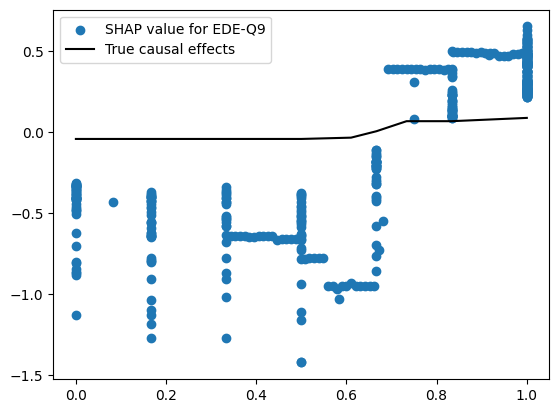

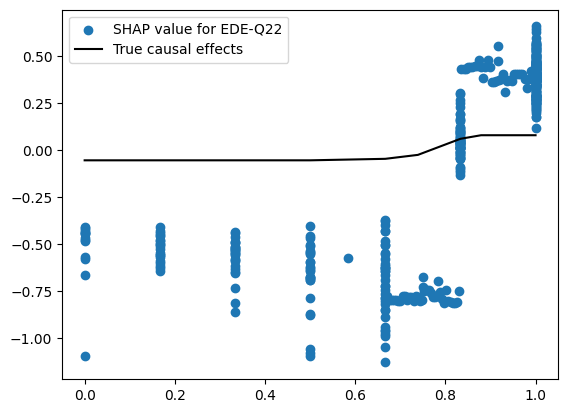

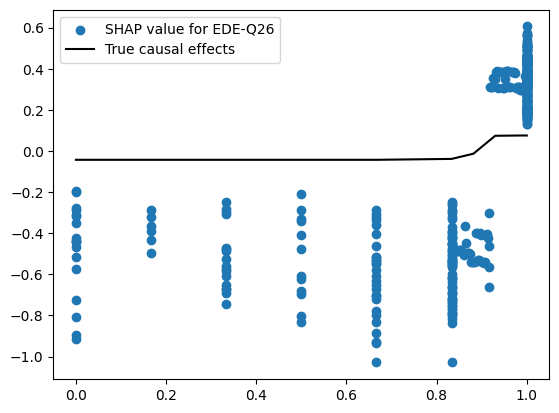

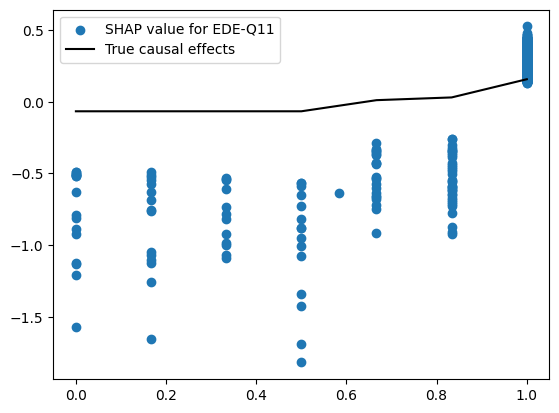

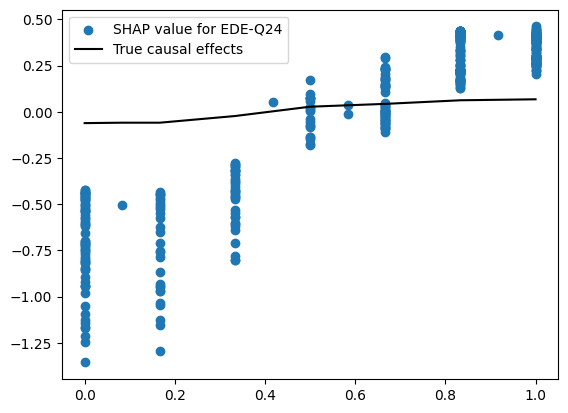

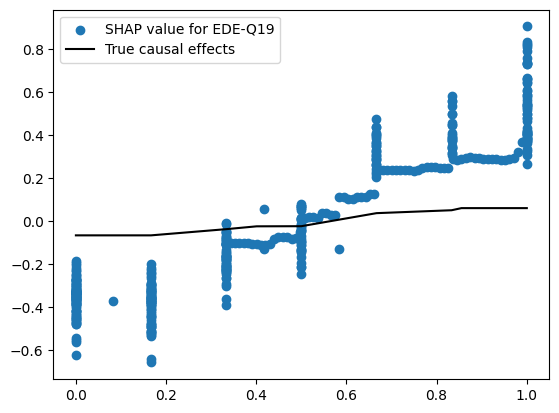

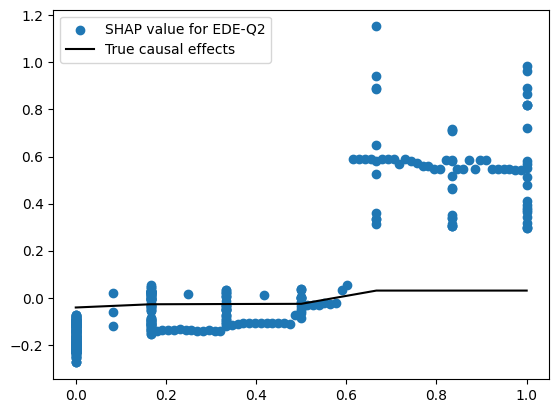

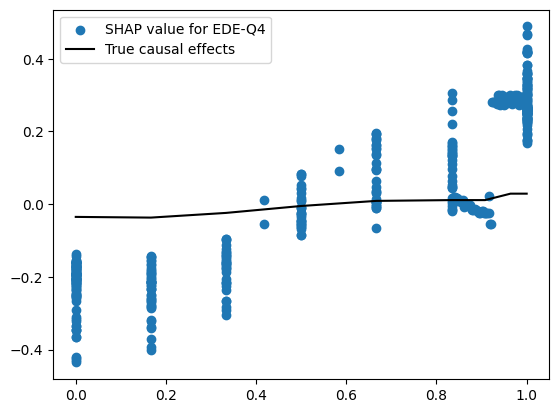

In [27]:
import shap
import numpy as np
import matplotlib.pyplot as plt

import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'shap_values', 'data', 'marginal_effects', and 'columns' are defined

# Retrieve SHAP values in NumPy format
shap_array = shap_values.values if isinstance(shap_values, shap.Explanation) else shap_values

# Extract the top 15 feature indices based on SHAP importance
sorted_indices = np.argsort(np.mean(np.abs(shap_array), axis=0))[::-1][:15]
important_features = [X.columns[i] for i in sorted_indices]
# print(important_features)
# Filter SHAP values for the important features
filtered_shap_values = shap_array[:, sorted_indices]

# Plot scatter plots for each of the top 15 features and add the marginal effects
for i, feature in enumerate(important_features):
    # Get marginal effects corresponding to the feature
    marginal_effect = marginal_effects_data[sorted_indices[i]]
    x, y = marginal_effect  # Unpack x and y arrays from marginal effects

    # Create a scatter plot with overlay for the current feature

    plt.scatter(shap_values[:,sorted_indices[i]].data,shap_values[:,sorted_indices[i]].values ,label=f"SHAP value for {feature}")

    # # Plot true causal effects on top of the scatter plot
    plt.plot(x, y, color='black', label='True causal effects')
    plt.legend()
    plt.show()

# DoublML and DoWhy

In [ ]:
!pip install doubleml
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install scipy

In [ ]:
# install EconML
!pip install -q econml
import econml

In [ ]:
!pip install doubleml
!pip install --upgrade doubleml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
from doubleml import DoubleMLData

NameError: name 'y_true' is not defined

In [ ]:
import pandas as pd

from doubleml import DoubleMLData, DoubleMLPLR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import clone

# Assuming 'data' is your DataFrame and is already loaded with the appropriate structure

try:
    dml_data = DoubleMLData(data, y_col='Y', d_cols='A')
except Exception as e:
    print("Error creating DoubleMLData:", e)

# Split the data into training and validation sets
df_train, df_test = train_test_split(data, test_size=0.3, random_state=123)

# Setup the DoubleML model with XGBoost
learner = XGBRegressor(n_estimators=100, random_state=123, use_label_encoder=False)
ml_g = clone(learner)  # model for the outcome equation
ml_m = clone(learner)  # model for the treatment equation

dml_plr = DoubleMLPLR(dml_data, ml_g, ml_m)

# Fit the DoubleML model
dml_plr.fit()

# Print the estimated causal effect
print("Estimated causal effect (Average Treatment Effect) of A on Y:")
try:
    print(dml_plr.summary())
except Exception as e:
    print("Error printing summary:", e)

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

# Peace and mean peace


In [28]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.integrate import quad

# Function to fit KDE and return a probability density function
def fit_kde_and_get_pdf(column_data):
    # Reshape data for sklearn (it expects a 2D array)
    data = column_data.values.reshape(-1, 1)

    # Fit the KDE model
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(data)

    # Define a function to represent the PDF using the KDE
    def pdf(x):
        return np.exp(kde.score_samples([[x]]))[0]

    return pdf

# Dictionary to hold the PDF functions for each column
pdf_functions = {}

for column in X:
    pdf_functions[column] = fit_kde_and_get_pdf(data[column])

# Now, pdf_functions contains a function for each column that computes the probability density.


In [29]:
def PEACE(d):
  peace = {}
  for c in X.columns:
    index = X.columns.get_loc(c)
    effect = 0
    for i in range(1, len(marginal_effects_data[index][0])):
      effect += abs(marginal_effects_data[index][1][i] - marginal_effects_data[index][1][i-1])*(4*(pdf_functions[c](marginal_effects_data[index][0][i])*pdf_functions[c](marginal_effects_data[index][0][i-1]))**d)
    peace[c] = effect
  return peace

In [ ]:
import matplotlib.pyplot as plt

Calculate PEACE Values of Different Degrees


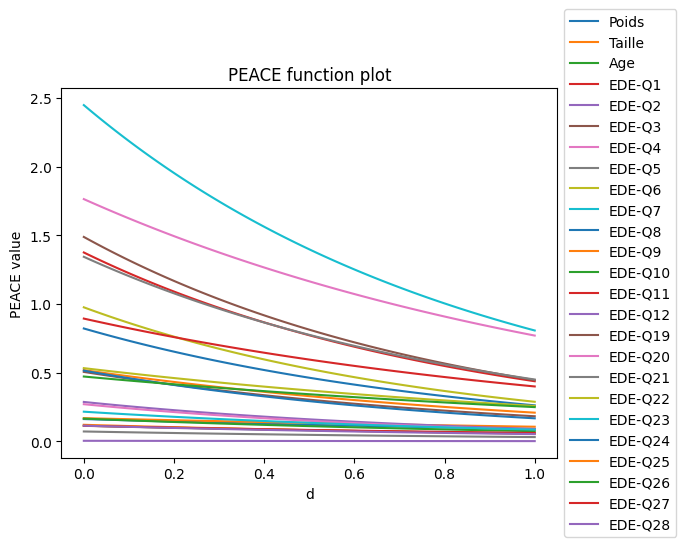

In [30]:
d_values = np.linspace(0, 1, 100)
# Initialize a dictionary to hold the computed values
peace_values = {c: [] for c in X.columns}

# Compute PEACE(d) for each d value
for d in d_values:
    peace = PEACE(d)
    for c in peace:
        peace_values[c].append(peace[c])

# Plot the results
for c in peace_values:
    ax=plt.plot(d_values, peace_values[c], label=c)

plt.xlabel('d')
plt.ylabel('PEACE value')
plt.title('PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Define the Availability Function and Use it to Calculate the MEAN PEACE Values

In [31]:
def precompute_pdf_values(X, pdf_functions):
    pdf_values = {}
    for c in X.columns:
        pdf_values[c] = np.array([pdf_functions[c](val) for val in marginal_effects_data[X.columns.get_loc(c)][0]])
    return pdf_values

def Availability(d, X, pdf_values):
    availability = {}
    for c in X.columns:
        pdf_vals = pdf_values[c]
        availability[c] = np.sum(
            (4 * pdf_vals[1:] * pdf_vals[:-1]) ** d
        )
    return availability

# Precompute the PDF values once
pdf_values = precompute_pdf_values(X, pdf_functions)

availability_values = {c: [Availability(d, X, pdf_values)[c] for d in d_values] for c in X.columns}
mean_peace_values = {c: np.array(peace_values[c]) / np.array(availability_values[c]) for c in X.columns}

Plot the 15 highest Mean PEACE Functions

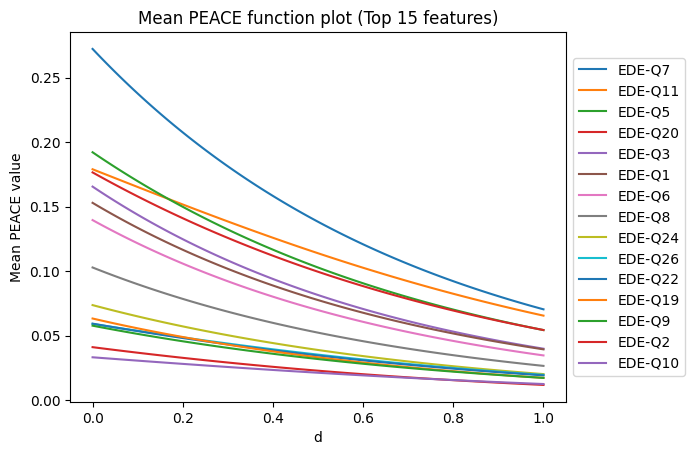

In [32]:
# Compute the mean of mean_peace_values for sorting
mean_peace_means = {c: np.mean(values) for c, values in mean_peace_values.items()}

# Get the top 15 features with the highest mean PEACE values
top_15_features = sorted(mean_peace_means, key=mean_peace_means.get, reverse=True)[:15]

# Plot the results for the top 15 features
for c in top_15_features:
    plt.plot(d_values, mean_peace_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean PEACE value')
plt.title('Mean PEACE function plot (Top 15 features)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Plot all Mean PEACE Functions

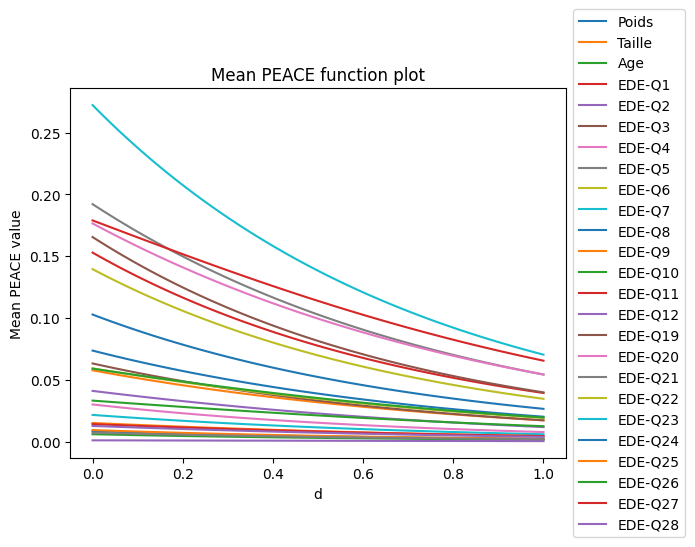

In [33]:
for c in mean_peace_values:
    plt.plot(d_values, mean_peace_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean PEACE value')
plt.title('Mean PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Plot 15 highest MEAN PEACE Functions One by One

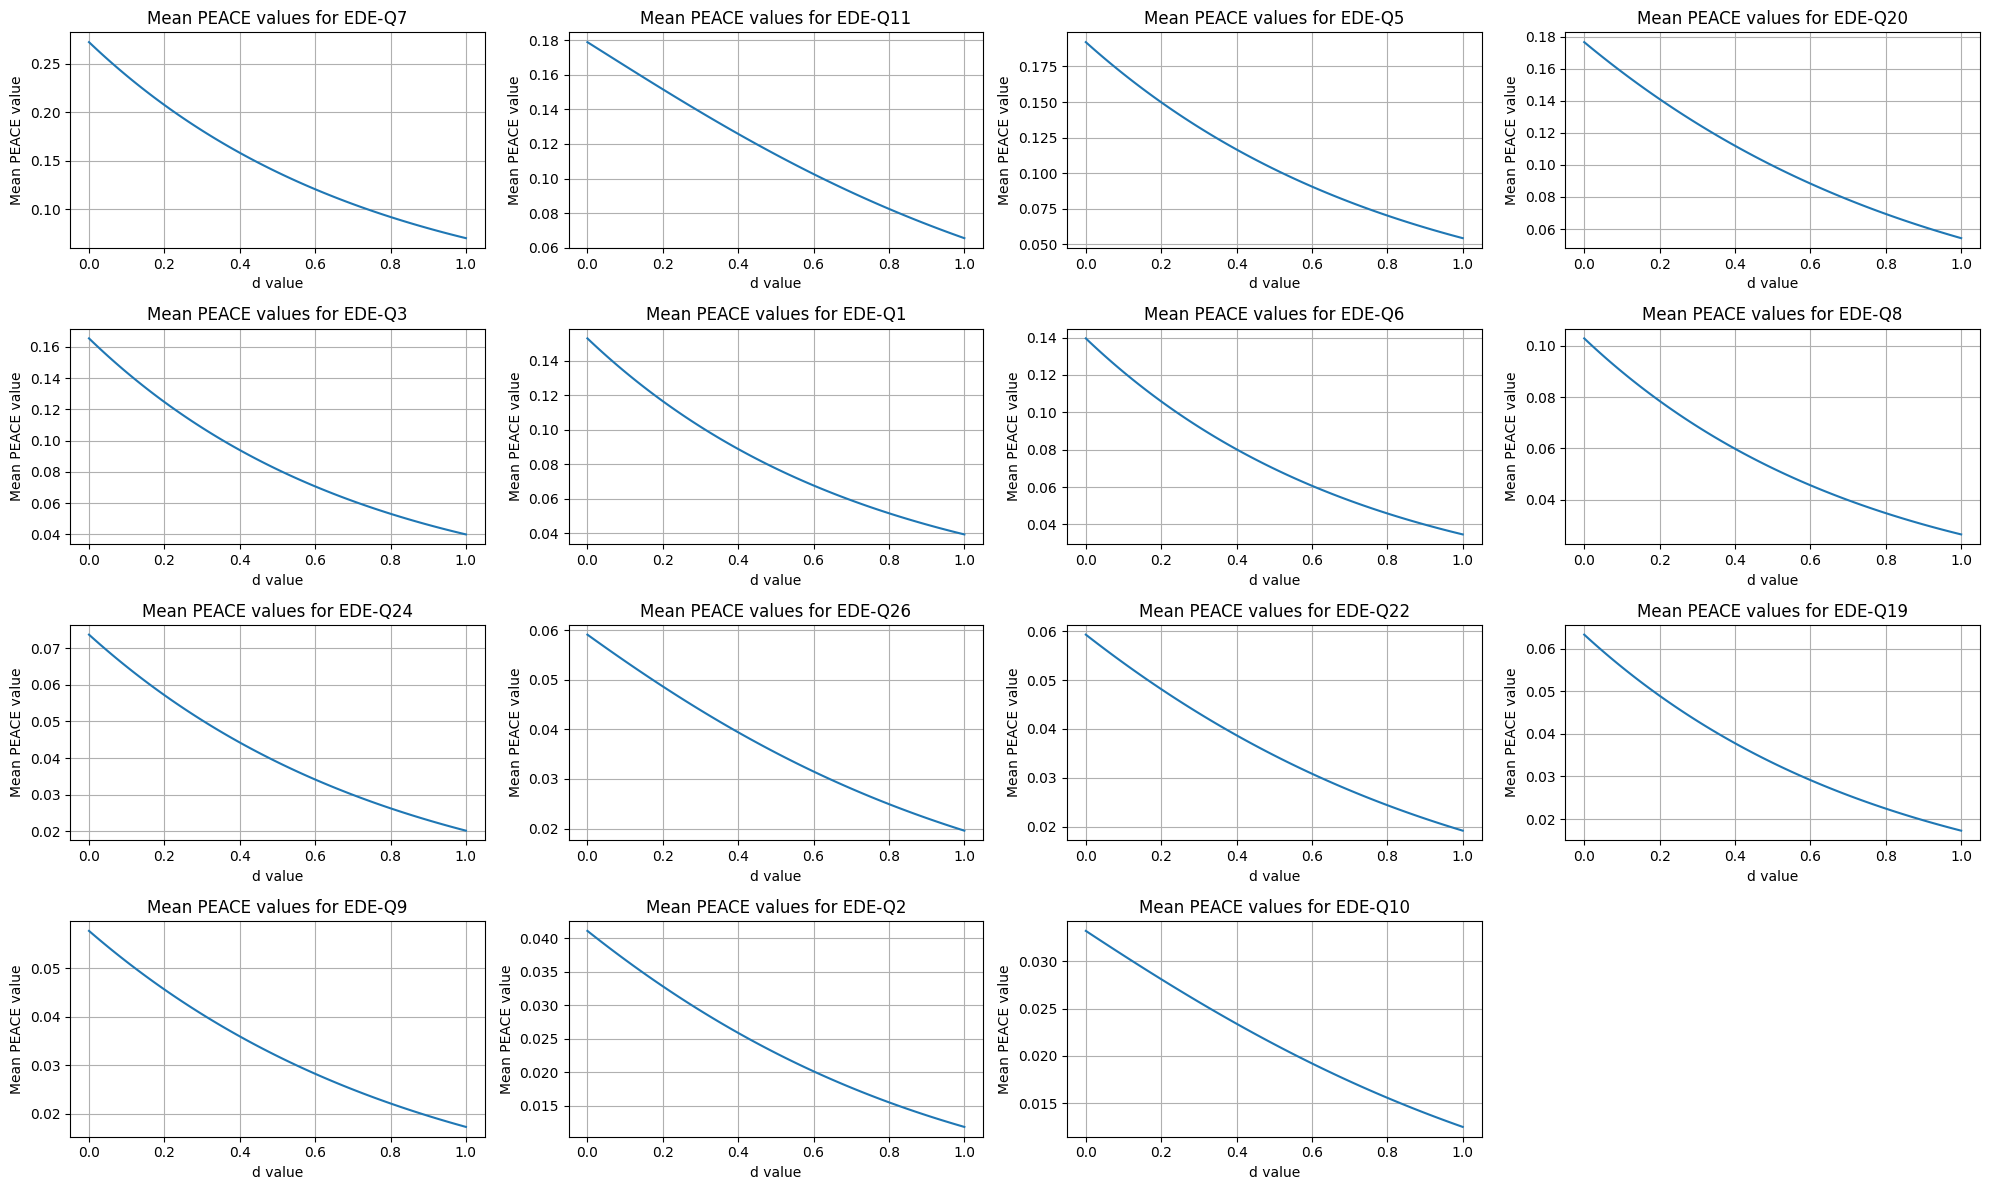

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Create subplots with appropriate grid size
num_features = len(top_15_features)
num_rows = int(np.ceil(np.sqrt(num_features)))
num_cols = int(np.ceil(num_features / num_rows))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 3 * num_rows))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Plot only the top 15 features
for i, c in enumerate(top_15_features):
    ax = axs[i]
    ax.plot(d_values, mean_peace_values[c], label=f'PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('Mean PEACE value')
    ax.set_title(f'Mean PEACE values for {c}')
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Plot All Mean PEACE Functions One by One

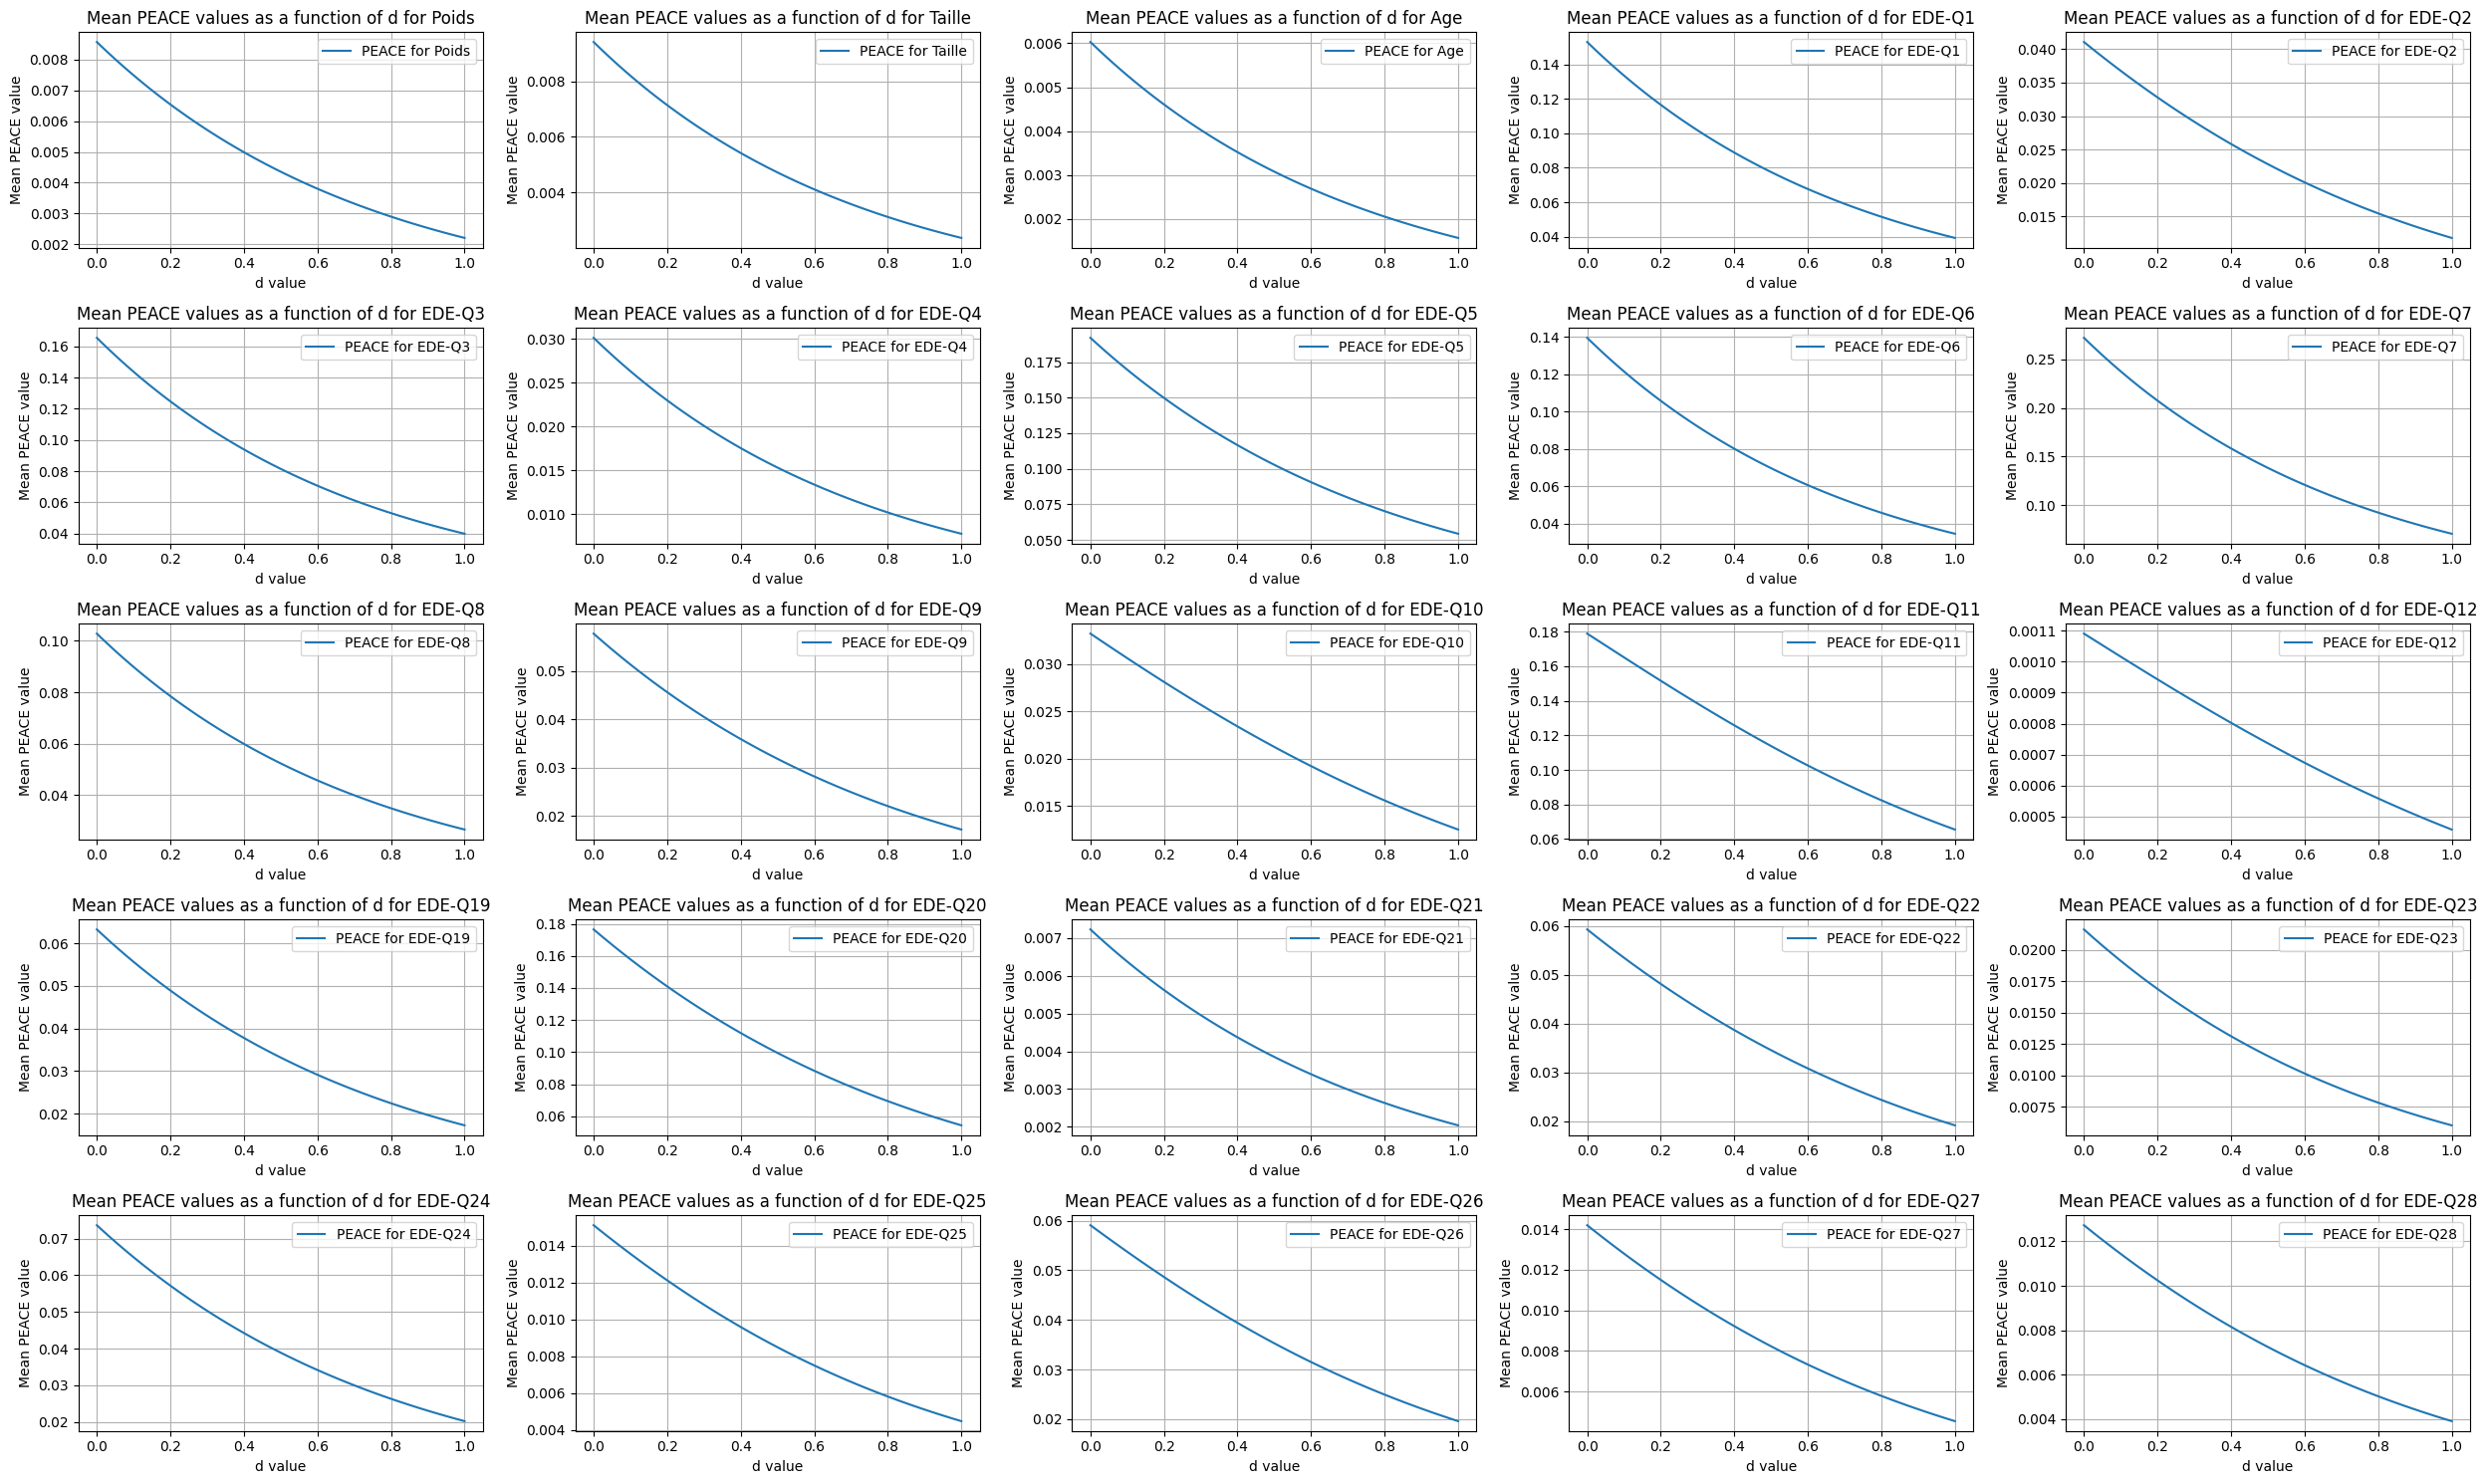

In [35]:
import numpy as np
import matplotlib.pyplot as plt

num_columns = len(X.columns)

# Calculate the grid size
num_rows = int(np.ceil(np.sqrt(num_columns)))
num_cols = int(np.ceil(num_columns / num_rows))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 3 * num_rows))

# Flatten the axes array for easy indexing
axs = axs.flatten()

for i, (c, values) in enumerate(mean_peace_values.items()):
    ax = axs[i]
    ax.plot(d_values, values, label=f'PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('Mean PEACE value')
    ax.set_title(f'Mean PEACE values as a function of d for {c}')
    ax.legend()
    ax.grid(True)

# Hide any unused axes
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Print all Variables whose MEAN PEACE Functions have at Least One value Greater than 0.1

In [36]:
#  PEACE > 0.01
columns_with_values = {col: max(values) for col, values in mean_peace_values.items() if any(value > 0.01 for value in values)}
formatted_columns_with_values = [f"{col},{value:.2f}" for col, value in columns_with_values.items()]

formatted_columns_with_values

['EDE-Q1,0.15',
 'EDE-Q2,0.04',
 'EDE-Q3,0.17',
 'EDE-Q4,0.03',
 'EDE-Q5,0.19',
 'EDE-Q6,0.14',
 'EDE-Q7,0.27',
 'EDE-Q8,0.10',
 'EDE-Q9,0.06',
 'EDE-Q10,0.03',
 'EDE-Q11,0.18',
 'EDE-Q19,0.06',
 'EDE-Q20,0.18',
 'EDE-Q22,0.06',
 'EDE-Q23,0.02',
 'EDE-Q24,0.07',
 'EDE-Q25,0.02',
 'EDE-Q26,0.06',
 'EDE-Q27,0.01',
 'EDE-Q28,0.01']

Define Positive PEACE Function

In [37]:
def positive(r):
  return max(r,0)

def PEACE_positive(d):
  peace_positive = {}
  for c in X.columns:
    index = X.columns.get_loc(c)
    effect = 0
    for i in range(1, len(marginal_effects_data[index][0])):
      effect += positive(marginal_effects_data[index][1][i] - marginal_effects_data[index][1][i-1])*((4*pdf_functions[c](marginal_effects_data[index][0][i])*pdf_functions[c](marginal_effects_data[index][0][i-1])**d))
    peace_positive[c] = effect
  return peace_positive

Calculate Positive PEACE Values, Define Mean Positive PEACE Function, Calculate its Values, and Plot the 15 Highest MEAN Positive PEACE Functions

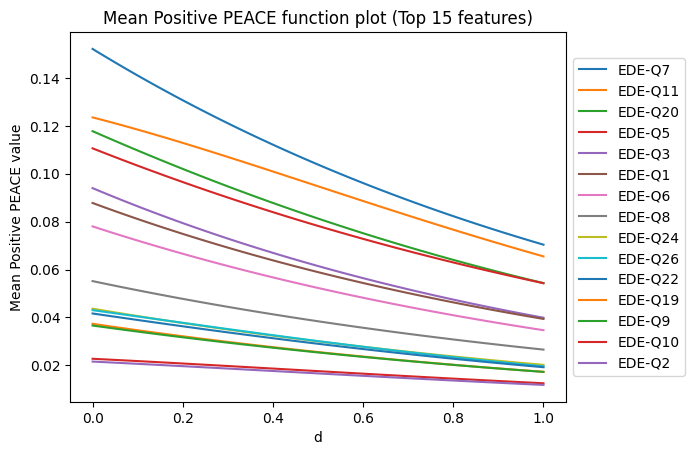

In [38]:
# Initialize a dictionary to hold the computed values
peace_positive_values = {c: [] for c in X.columns}

# Compute PEACE(d) for each d value
for d in d_values:
    peace_positive = PEACE_positive(d)
    for c in peace:
        peace_positive_values[c].append(peace_positive[c])

mean_peace_positive_values = {c: np.array(peace_positive_values[c]) / np.array(availability_values[c]) for c in X.columns}

# Compute the mean of mean_peace_values for sorting
mean_peace_positive_means = {c: np.mean(values) for c, values in mean_peace_positive_values.items()}

# Get the top 15 features with the highest mean PEACE values
top_15_features = sorted(mean_peace_positive_means, key=mean_peace_positive_means.get, reverse=True)[:15]

# Plot the results for the top 15 features
for c in top_15_features:
    plt.plot(d_values, mean_peace_positive_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean Positive PEACE value')
plt.title('Mean Positive PEACE function plot (Top 15 features)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Plot the Mean Positive PEACE Functions of All Variables

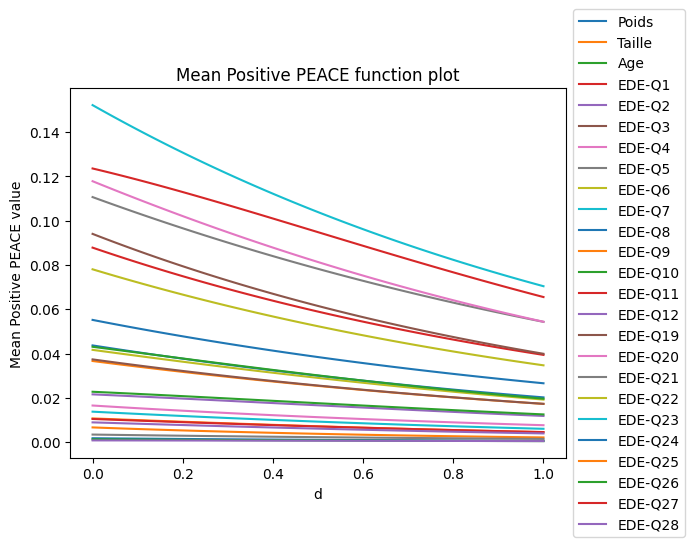

In [39]:
for c in mean_peace_positive_values:
    plt.plot(d_values, mean_peace_positive_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean Positive PEACE value')
plt.title('Mean Positive PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Print All Variables whose Positive PEACE Value Function have at Least One Value Greater than 0.001

In [40]:
columns_with_values = {col: max(values) for col, values in mean_peace_positive_values.items()
                       if any(float(value) > 0.001 for value in values if isinstance(value, str) or isinstance(value, float))}
formatted_columns_with_values = [f"{col},{value:.3f}" for col, value in columns_with_values.items()]

formatted_columns_with_values

['Poids,0.002',
 'Taille,0.007',
 'Age,0.001',
 'EDE-Q1,0.088',
 'EDE-Q2,0.022',
 'EDE-Q3,0.094',
 'EDE-Q4,0.017',
 'EDE-Q5,0.111',
 'EDE-Q6,0.078',
 'EDE-Q7,0.152',
 'EDE-Q8,0.055',
 'EDE-Q9,0.037',
 'EDE-Q10,0.023',
 'EDE-Q11,0.124',
 'EDE-Q19,0.037',
 'EDE-Q20,0.118',
 'EDE-Q21,0.003',
 'EDE-Q22,0.042',
 'EDE-Q23,0.014',
 'EDE-Q24,0.044',
 'EDE-Q25,0.011',
 'EDE-Q26,0.043',
 'EDE-Q27,0.010',
 'EDE-Q28,0.009']

Define Mean Negative PEACE Function

In [41]:
def negative(r):
  return max(-r,0)

def PEACE_negative(d):
  peace_negative = {}
  for c in X.columns:
    index = X.columns.get_loc(c)
    effect = 0
    for i in range(1, len(marginal_effects_data[index][0])):
      effect += negative(marginal_effects_data[index][1][i] - marginal_effects_data[index][1][i-1])*((4*pdf_functions[c](marginal_effects_data[index][0][i])*pdf_functions[c](marginal_effects_data[index][0][i-1])**d))
      peace_negative[c] = effect
  return peace_negative

Calculate Negative PEACE Values, Define Mean Negative PEACE Function, Calculate its Values, and Plot the 15 Highest MEAN Negative PEACE Functions

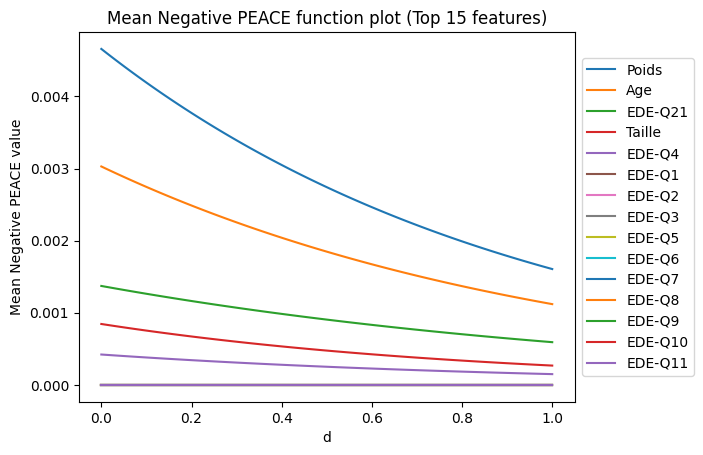

In [42]:
# Initialize a dictionary to hold the computed values
peace_negative_values = {c: [] for c in X.columns}

# Compute PEACE(d) for each d value
for d in d_values:
    peace_negative = PEACE_negative(d)
    for c in peace:
        peace_negative_values[c].append(peace_negative[c])

mean_peace_negative_values = {c: np.array(peace_negative_values[c]) / np.array(availability_values[c]) for c in X.columns}

# Compute the mean of mean_peace_values for sorting
mean_peace_negative_means = {c: np.mean(values) for c, values in mean_peace_negative_values.items()}

# Get the top 15 features with the highest mean PEACE values
top_15_features = sorted(mean_peace_negative_means, key=mean_peace_negative_means.get, reverse=True)[:15]

# Plot the results for the top 15 features
for c in top_15_features:
    plt.plot(d_values, mean_peace_negative_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean Negative PEACE value')
plt.title('Mean Negative PEACE function plot (Top 15 features)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Plot the Mean Negative PEACE Functions of All Variables
Print All Variables whose Negative PEACE Value Function have at Least One Value Greater than 0.001

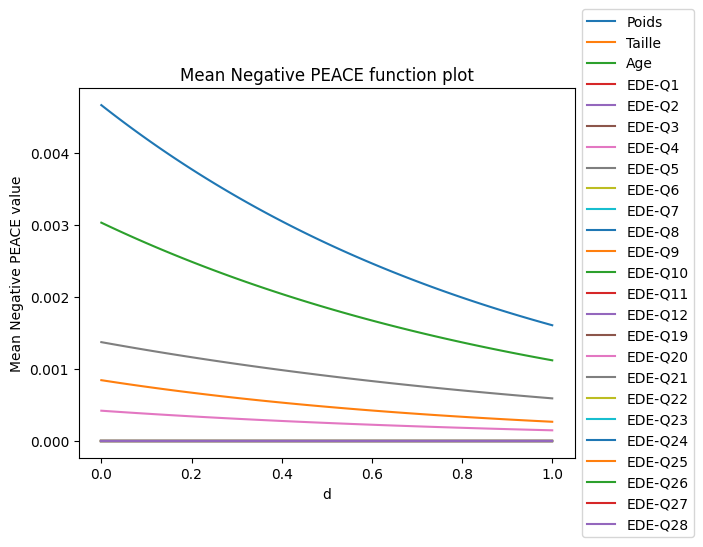

In [43]:
for c in mean_peace_negative_values:
    plt.plot(d_values, mean_peace_negative_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Mean Negative PEACE value')
plt.title('Mean Negative PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
#negative_peace>0.001

columns_with_values = {col: max(values) for col, values in mean_peace_negative_values.items()
                       if any(float(value) > 0.001 for value in values if isinstance(value, str) or isinstance(value, float))}
formatted_columns_with_values = [f"{col},{value:.3f}" for col, value in columns_with_values.items()]

formatted_columns_with_values

['Poids,0.005', 'Age,0.003', 'EDE-Q21,0.001']

Plot the 15 Highest Mean Positive Functions vs Their Corresponding Mean Negative Functions

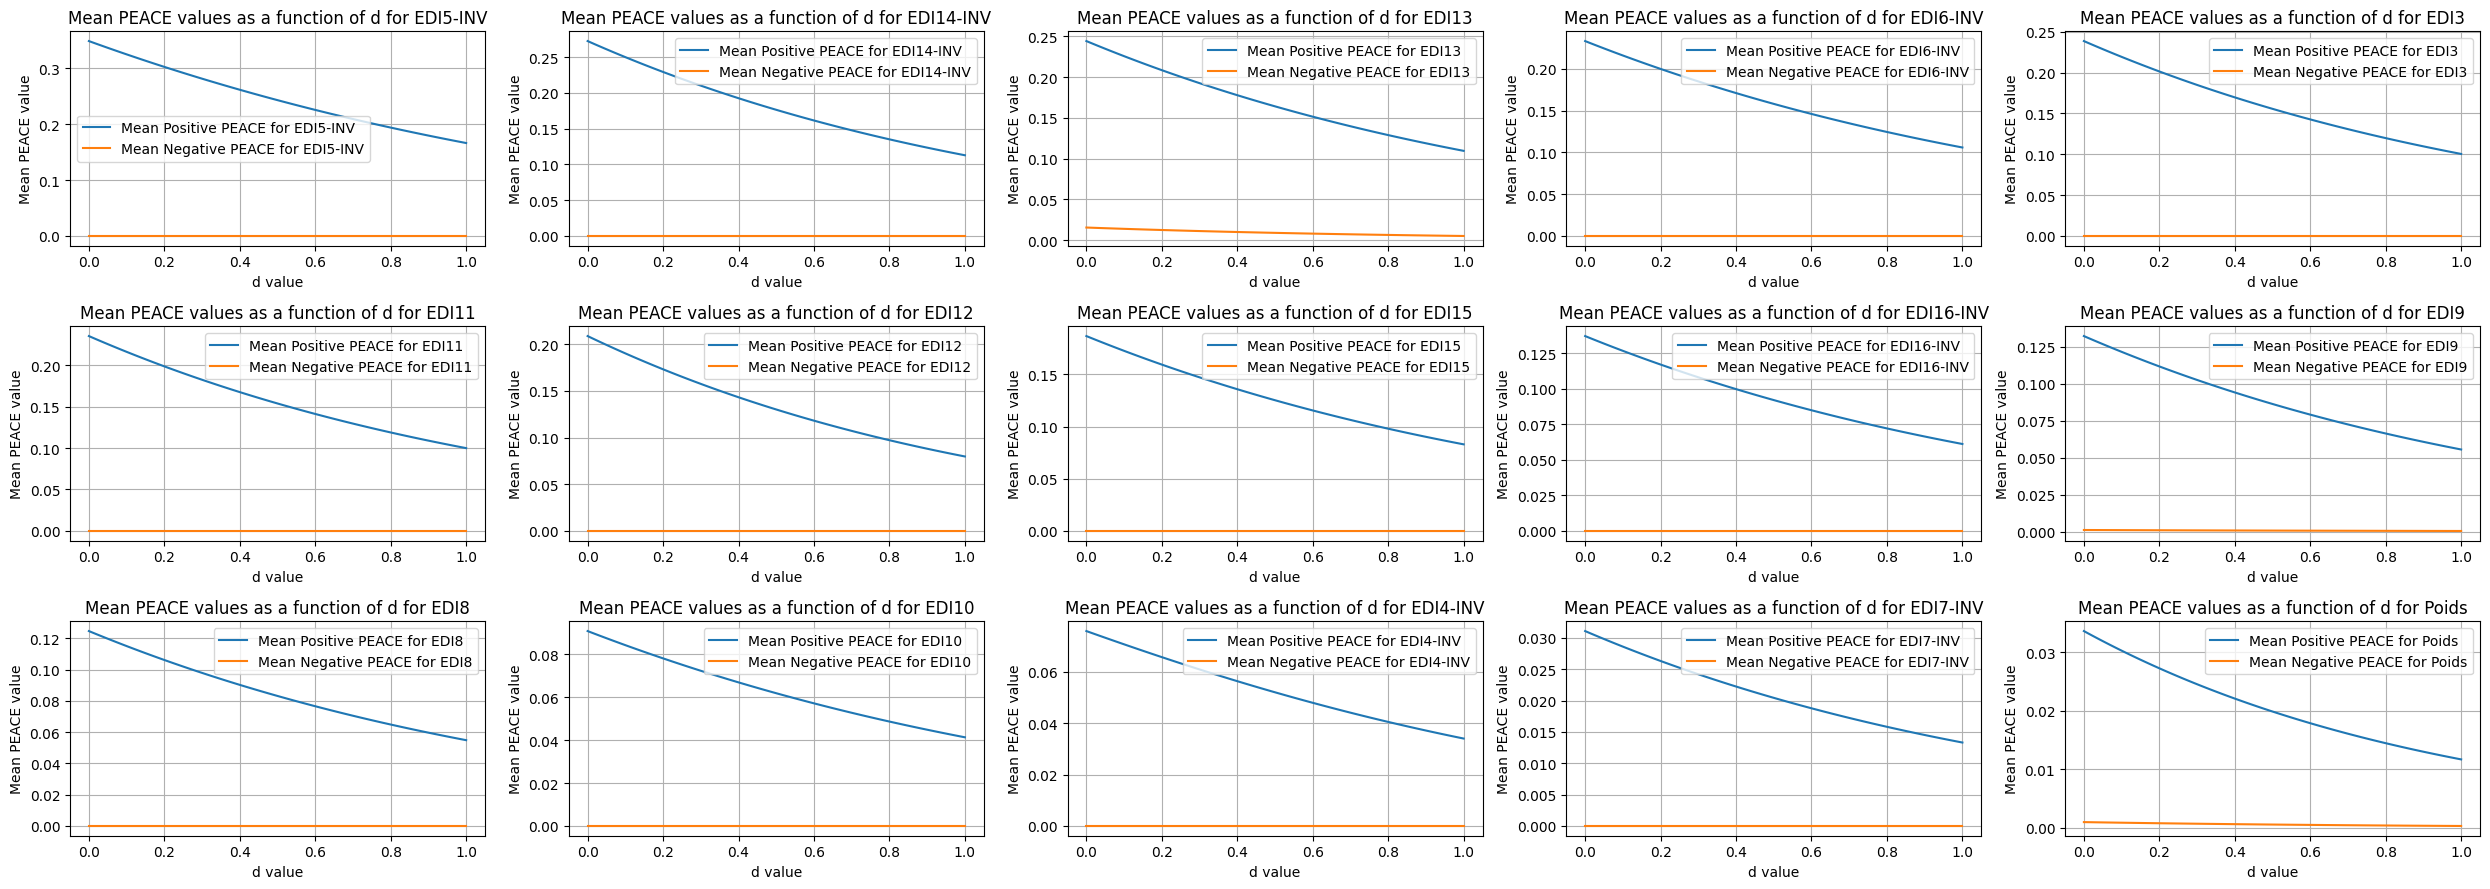

In [ ]:
# Compute the mean of mean_peace_positive_values for sorting
mean_peace_positive_means = {c: np.mean(values) for c, values in mean_peace_positive_values.items()}

# Get the top 15 features with the highest mean PEACE values
top_15_features = sorted(mean_peace_positive_means, key=mean_peace_positive_means.get, reverse=True)[:15]

# Set up the grid dimensions for the plots
num_features = len(top_15_features)
rows = int(np.sqrt(num_features))
cols = int(np.ceil(num_features / rows))

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows))
axs = axs.flatten()  # Flatten the array to make it easier to iterate over

for i, c in enumerate(top_15_features):
    ax = axs[i]
    ax.plot(d_values, mean_peace_positive_values[c], label=f'Mean Positive PEACE for {c}')
    ax.plot(d_values, mean_peace_negative_values[c], label=f'Mean Negative PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('Mean PEACE value')
    ax.set_title(f'Mean PEACE values as a function of d for {c}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Plot the 15 Highest Mean Negative Functions vs Their Corresponding Mean Positive Functions

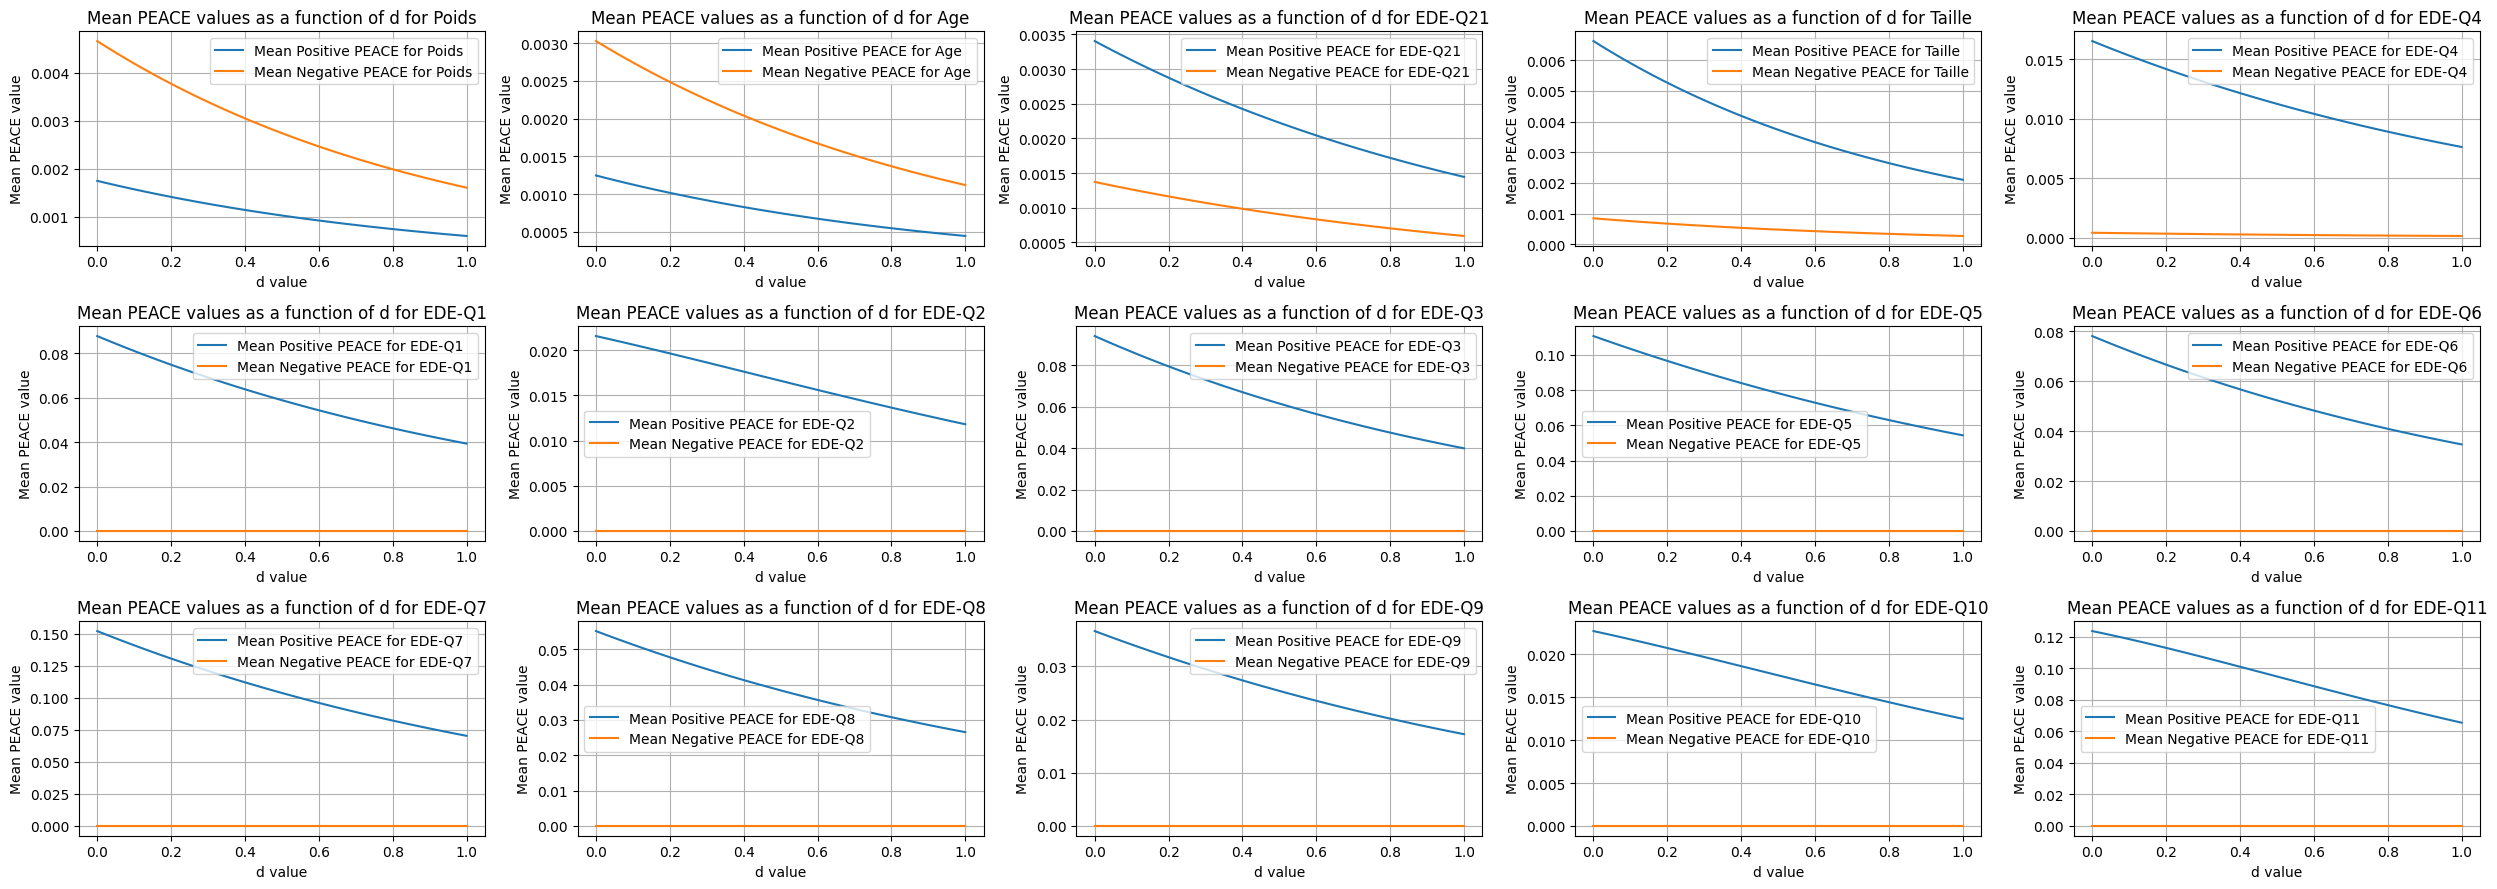

In [45]:
# Compute the mean of mean_peace_negative_values for sorting
mean_peace_negative_means = {c: np.mean(values) for c, values in mean_peace_negative_values.items()}

# Get the top 15 features with the highest mean PEACE values
top_15_features = sorted(mean_peace_negative_means, key=mean_peace_negative_means.get, reverse=True)[:15]

# Set up the grid dimensions for the plots
num_features = len(top_15_features)
rows = int(np.sqrt(num_features))
cols = int(np.ceil(num_features / rows))

fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows))
axs = axs.flatten()  # Flatten the array to make it easier to iterate over

for i, c in enumerate(top_15_features):
    ax = axs[i]
    ax.plot(d_values, mean_peace_positive_values[c], label=f'Mean Positive PEACE for {c}')
    ax.plot(d_values, mean_peace_negative_values[c], label=f'Mean Negative PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('Mean PEACE value')
    ax.set_title(f'Mean PEACE values as a function of d for {c}')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


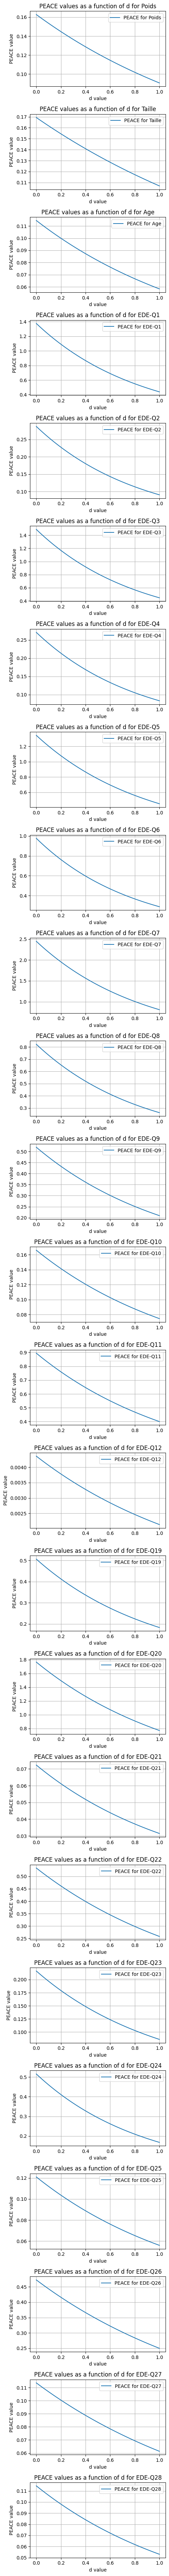

In [46]:
num_columns = len(X.columns)
fig, axs = plt.subplots(num_columns, 1, figsize=(5, 3 * num_columns))

for i, (c, values) in enumerate(peace_values.items()):
    ax = axs[i] if num_columns > 1 else axs
    ax.plot(d_values, values, label=f'PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('PEACE value')
    ax.set_title(f'PEACE values as a function of d for {c}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [47]:
def positive(r):
  return max(r,0)

def PEACE_positive(d):
  peace_positive = {}
  for c in X.columns:
    index = X.columns.get_loc(c)
    effect = 0
    for i in range(1, len(marginal_effects_data[index][0])):
      effect += positive(marginal_effects_data[index][1][i] - marginal_effects_data[index][1][i-1])*((4*pdf_functions[c](marginal_effects_data[index][0][i])*pdf_functions[c](marginal_effects_data[index][0][i-1])**d))
    peace_positive[c] = effect
  return peace_positive

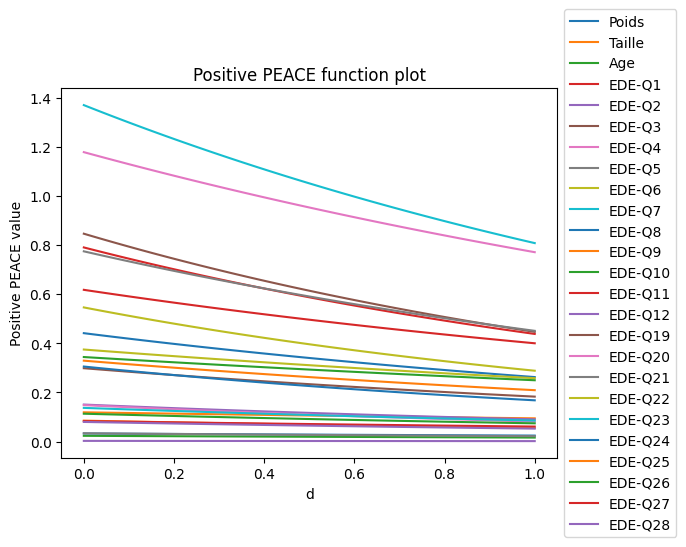

In [48]:
# Initialize a dictionary to hold the computed values
peace_positive_values = {c: [] for c in X.columns}

# Compute PEACE(d) for each d value
for d in d_values:
    peace_positive = PEACE_positive(d)
    for c in peace:
        peace_positive_values[c].append(peace_positive[c])

# Plot the results
for c in peace_positive_values:
    plt.plot(d_values, peace_positive_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Positive PEACE value')
plt.title('Positive PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [49]:
def negative(r):
  return max(-r,0)

def PEACE_negative(d):
  peace_negative = {}
  for c in X.columns:
    index = X.columns.get_loc(c)
    effect = 0
    for i in range(1, len(marginal_effects_data[index][0])):
      effect += negative(marginal_effects_data[index][1][i] - marginal_effects_data[index][1][i-1])*((4*pdf_functions[c](marginal_effects_data[index][0][i])*pdf_functions[c](marginal_effects_data[index][0][i-1])**d))
      peace_negative[c] = effect
  return peace_negative

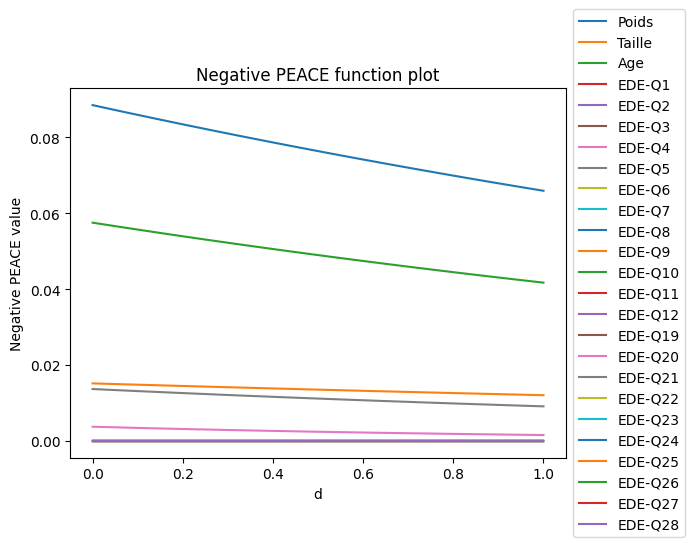

In [50]:
# Initialize a dictionary to hold the computed values
peace_negative_values = {c: [] for c in X.columns}

# Compute PEACE(d) for each d value
for d in d_values:
    peace_negative = PEACE_negative(d)
    for c in peace:
        peace_negative_values[c].append(peace_negative[c])

# Plot the results
for c in peace_negative_values:
    plt.plot(d_values, peace_negative_values[c], label=c)

plt.xlabel('d')
plt.ylabel('Negative PEACE value')
plt.title('Negative PEACE function plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

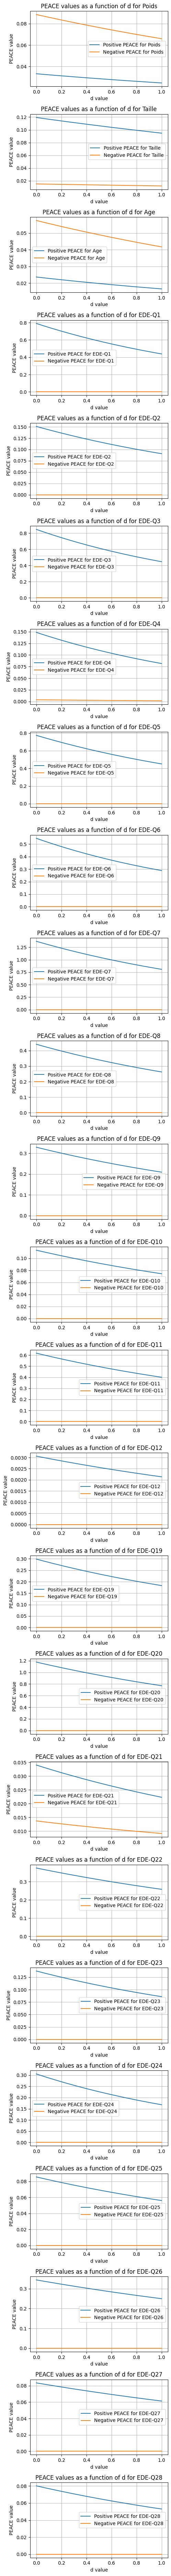

In [51]:
fig, axs = plt.subplots(num_columns, 1, figsize=(5, 3 * num_columns))

for i, c in enumerate(peace_positive_values.keys()):
    ax = axs[i] if num_columns > 1 else axs
    ax.plot(d_values, peace_positive_values[c], label=f'Positive PEACE for {c}')
    ax.plot(d_values, peace_negative_values[c], label=f'Negative PEACE for {c}')
    ax.set_xlabel('d value')
    ax.set_ylabel('PEACE value')
    ax.set_title(f'PEACE values as a function of d for {c}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()